In [97]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.linear_model import Lasso,LassoCV,LinearRegression,RidgeCV,ElasticNet
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [2]:
oscars_df = pd.read_csv('oscar_movies_data_2.csv')

In [3]:
oscars_df.describe()

Unnamed: 0  runtime (mins)  metacritic score        budget  \
count  1136.000000     1136.000000       1136.000000  1.072000e+03   
mean   1974.561620      120.032570         72.083627  4.289049e+07   
std     981.326583       21.817864         13.554168  5.066237e+07   
min       0.000000       70.000000         16.000000  6.500000e+04   
25%    1132.750000      105.000000         64.000000  1.193676e+07   
50%    2181.500000      118.000000         74.000000  2.500000e+07   
75%    2841.750000      132.000000         82.000000  5.200000e+07   
max    3302.000000      224.000000        100.000000  3.210000e+08   

        Total_Noms  Avg_Award_Score  Awards_Best Actor in a Leading Role  \
count  1136.000000      1136.000000                           479.000000   
mean      2.930458        75.760802                             0.223382   
std       2.699895         4.823890                             0.416948   
min       1.000000        55.000000                             0.000000   
25%       1.000000        73.186275                             0.000000   
50%       2.000000        75.769912                             0.000000   
75%       4.000000        78.828571                             0.000000   
max      16.000000        86.111111                             1.000000   

       Awards_Best Actor in a Supporting Role  \
count                              479.000000   
mean                                 0.160752   
std                                  0.367686   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       Awards_Best Actress in a Leading Role  \
count                             479.000000   
mean                                0.144050   
std                                 0.351508   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       Awards_Best Art Direction-Set Decoration  ...  Writer_Aaron Sorkin  \
count                                479.000000  ...            63.000000   
mean                                   0.077244  ...             0.095238   
std                                    0.267258  ...             0.295901   
min                                    0.000000  ...             0.000000   
25%                                    0.000000  ...             0.000000   
50%                                    0.000000  ...             0.000000   
75%                                    0.000000  ...             0.000000   
max                                    1.000000  ...             1.000000   

       Writer_Joel Coen  Writer_John Logan  Writer_Lawrence Kasdan  \
count         63.000000          63.000000               63.000000   
mean           0.142857           0.079365                0.111111   
std            0.352738           0.272479                0.316794   
min            0.000000           0.000000                0.000000   
25%            0.000000           0.000000                0.000000   
50%            0.000000           0.000000                0.000000   
75%            0.000000           0.000000                0.000000   
max            1.000000           1.000000                1.000000   

       Writer_Paul Thomas Anderson  Writer_Pedro Almodóvar  \
count                    63.000000               63.000000   
mean                      0.079365                0.079365   
std                       0.272479                0.272479   
min                       0.000000                0.000000   
25%                       0.000000                0.000000   
50%                       0.000000                0.000000   
75%                       0.000000                0.000000

In [6]:
oscars_df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
oscars_df.head()

IMDBId                 movie title language    country  runtime (mins)  \
0  tt0091763                     Platoon  English        USA             120   
1  tt0082979                        Reds  English        USA             195   
2  tt0084434  An Officer and a Gentleman  English        USA             124   
3  tt0119360                    In & Out  English        USA              90   
4  tt0292542            Son of the Bride  Spanish  Argentina             123   

  mpaarating  metacritic score        budget     distributionCompany  \
0          R              92.0  6.000000e+06          Orion Pictures   
1         PG              76.0  3.200000e+07      Paramount Pictures   
2          R              75.0  7.500000e+06      Paramount Pictures   
3      PG-13              70.0  3.500000e+07      Paramount Pictures   
4          R              68.0  1.193676e+07  Sony Pictures Classics   

                              Awards  ...  Writer_Aaron Sorkin  \
0    Best Actor in a Supporting Role  ...                  NaN   
1       Best Actor in a Leading Role  ...                  NaN   
2    Best Actor in a Supporting Role  ...                  NaN   
3  Best Actress in a Supporting Role  ...                  NaN   
4         Best Foreign Language Film  ...                  NaN   

  Writer_Joel Coen Writer_John Logan Writer_Lawrence Kasdan  \
0              NaN               NaN                    NaN   
1              NaN               NaN                    NaN   
2              NaN               NaN                    NaN   
3              NaN               NaN                    NaN   
4              NaN               NaN                    NaN   

  Writer_Paul Thomas Anderson Writer_Pedro Almodóvar Writer_Peter Morgan  \
0                         NaN                    NaN                 NaN   
1                         NaN                    NaN                 NaN   
2                         NaN                    NaN                 NaN   
3                         NaN                    NaN                 NaN   
4                         NaN                    NaN                 NaN   

  Writer_Quentin Tarantino Writer_William Shakespeare Writer_Woody Allen  
0                      NaN                        NaN                NaN  
1                      NaN                        NaN                NaN  
2                      NaN                        NaN                NaN  
3                      NaN                        NaN                NaN  
4                      NaN                        NaN                NaN  

[5 rows x 108 columns]

In [8]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(oscars_df.select_dtypes(include=numerics).columns)
oscars_data = oscars_df[numerical_vars]
oscars_data.shape

(1136, 90)

In [19]:
oscars_data.columns

Index(['runtime (mins)', 'metacritic score', 'budget', 'Total_Noms',
       'Avg_Award_Score', 'Awards_Best Actor in a Leading Role',
       'Awards_Best Actor in a Supporting Role',
       'Awards_Best Actress in a Leading Role',
       'Awards_Best Art Direction-Set Decoration',
       'Awards_Best Cinematography', 'Awards_Best Director',
       'Awards_Best Film Editing', 'Awards_Best Motion Picture of the Year',
       'Awards_Best Picture', 'Awards_Best Sound', 'Director_Avg_Score',
       'Total_Director_Movies', 'Lead_Actor_Avg_Score',
       'Total_Movies_Lead_Actor', 'Avg_Rating_by_Genre',
       'Buena Vista Pictures', 'Columbia Pictures', 'Fox Searchlight Pictures',
       'Miramax', 'Paramount Pictures', 'Sony Pictures Classics',
       'Twentieth Century Fox', 'Universal Pictures',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.', 'Genre_Action',
       'Genre_Adventure', 'Genre_Animation', 'Genre_Biography', 'Genre_Comedy',
       'Genre_Crime', 'Genre_Documen

In [24]:
oscars_data.corr()

runtime (mins)  metacritic score    budget  \
runtime (mins)                    1.000000         -0.019315  0.215425   
metacritic score                 -0.019315          1.000000 -0.157224   
budget                            0.215425         -0.157224  1.000000   
Total_Noms                        0.355896          0.327954  0.047432   
Avg_Award_Score                   0.086005          0.472480 -0.063835   
...                                    ...               ...       ...   
Writer_Pedro Almodóvar           -0.215690          0.262293 -0.189725   
Writer_Peter Morgan              -0.056219          0.007698 -0.067855   
Writer_Quentin Tarantino          0.478316          0.042797  0.084962   
Writer_William Shakespeare        0.156014         -0.248121 -0.091080   
Writer_Woody Allen               -0.570291         -0.022064 -0.255973   

                            Total_Noms  Avg_Award_Score  \
runtime (mins)                0.355896         0.086005   
metacritic score              0.327954         0.472480   
budget                        0.047432        -0.063835   
Total_Noms                    1.000000         0.289615   
Avg_Award_Score               0.289615         1.000000   
...                                ...              ...   
Writer_Pedro Almodóvar       -0.222301        -0.052859   
Writer_Peter Morgan          -0.025416         0.084199   
Writer_Quentin Tarantino      0.247848         0.165826   
Writer_William Shakespeare   -0.071828        -0.220342   
Writer_Woody Allen           -0.177043        -0.052113   

                            Awards_Best Actor in a Leading Role  \
runtime (mins)                                         0.057316   
metacritic score                                       0.018230   
budget                                                -0.099809   
Total_Noms                                             0.034515   
Avg_Award_Score                                       -0.168470   
...                                                         ...   
Writer_Pedro Almodóvar                                -0.055902   
Writer_Peter Morgan                                   -0.080322   
Writer_Quentin Tarantino                               0.160357   
Writer_William Shakespeare                             0.266667   
Writer_Woody Allen                                     0.124226   

                            Awards_Best Actor in a Supporting Role  \
runtime (mins)                                           -0.002587   
metacritic score                                         -0.057095   
budget                                                   -0.086524   
Total_Noms                                               -0.082633   
Avg_Award_Score                                          -0.228600   
...                                                            ...   
Writer_Pedro Almodóvar                                   -0.100000   
Writer_Peter Morgan                                      -0.143684   
Writer_Quentin Tarantino                                 -0.041833   
Writer_William Shakespeare                               -0.178885   
Writer_Woody Allen                                        0.100000   

                            Awards_Best Actress in a Leading Role  \
runtime (mins)                                          -0.110538   
metacritic score                                        -0.117517   
budget                                                  -0.057325   
Total_Noms                                              -0.171212   
Avg_Award_Score                                         -0.432965   
...                                                           ...   
Writer_Pedro Almodóvar                                        NaN   
Writer_Peter Morgan                                           NaN   
Writer_Quentin Tarantino                                      NaN   
Writer_William Shakespeare                                    NaN   
Writer_Woody Allen       

<AxesSubplot:>

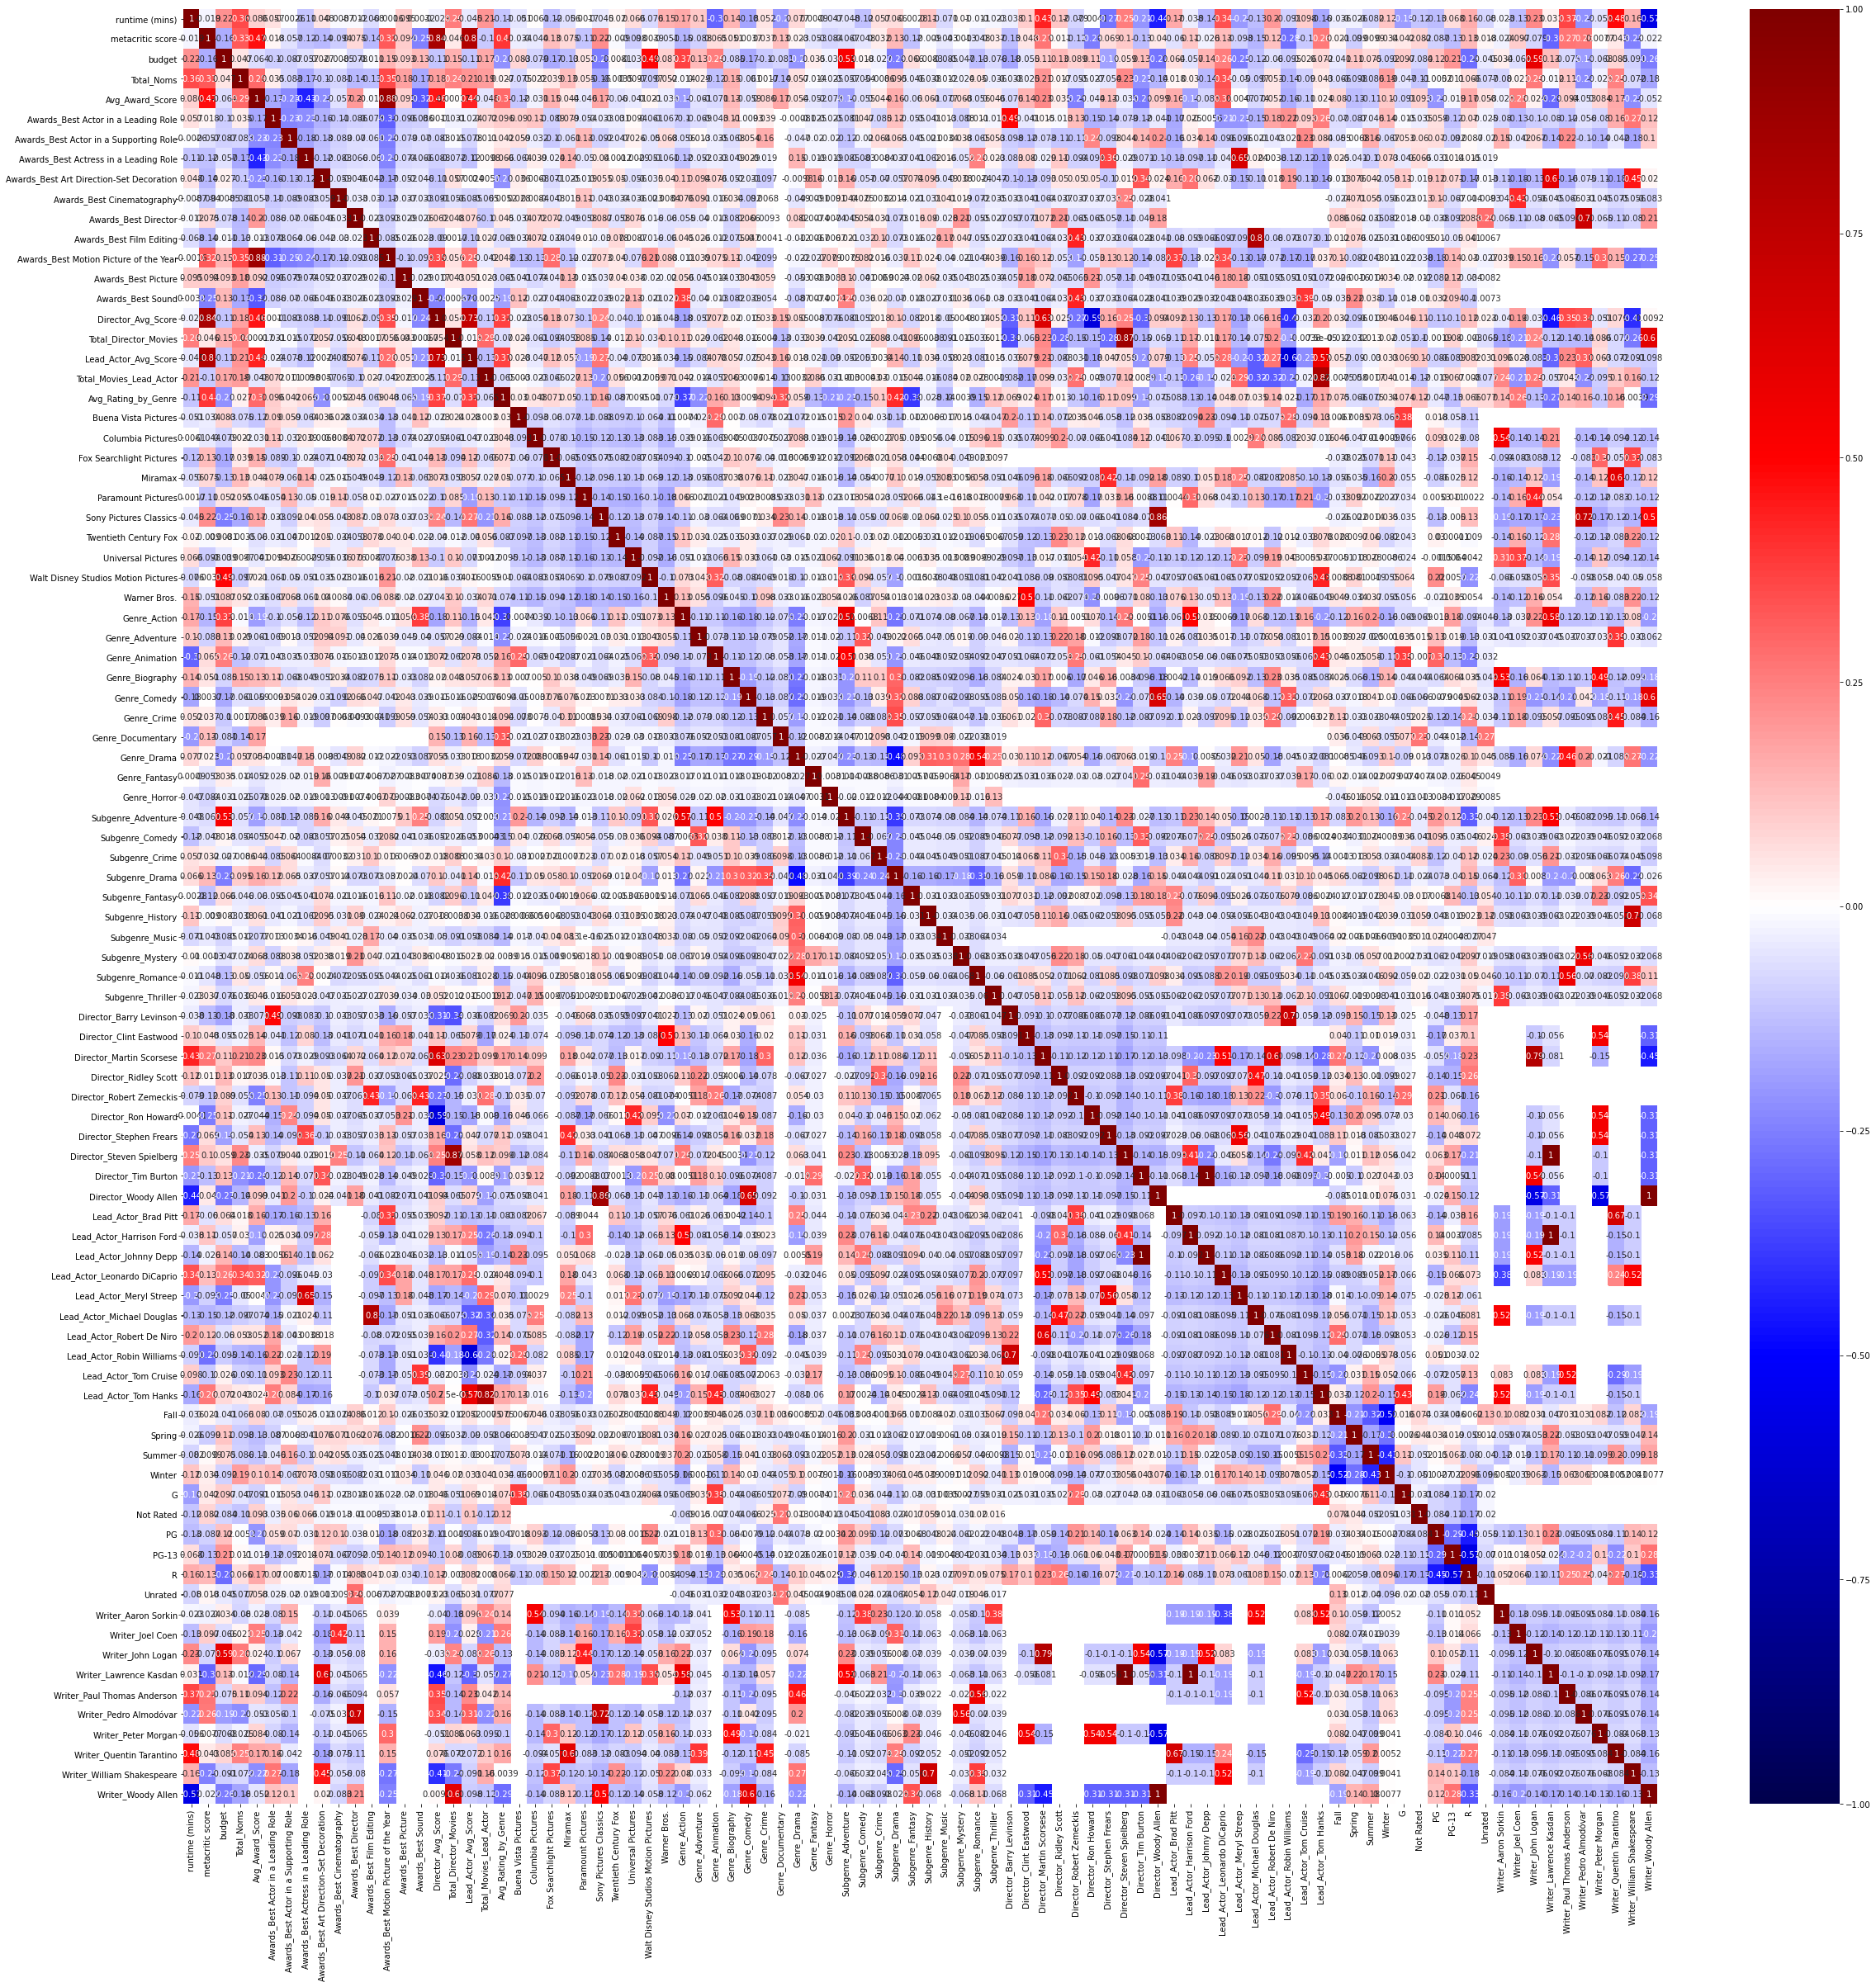

In [25]:
plt.figure(figsize=(40,40))
sns.heatmap(oscars_data.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

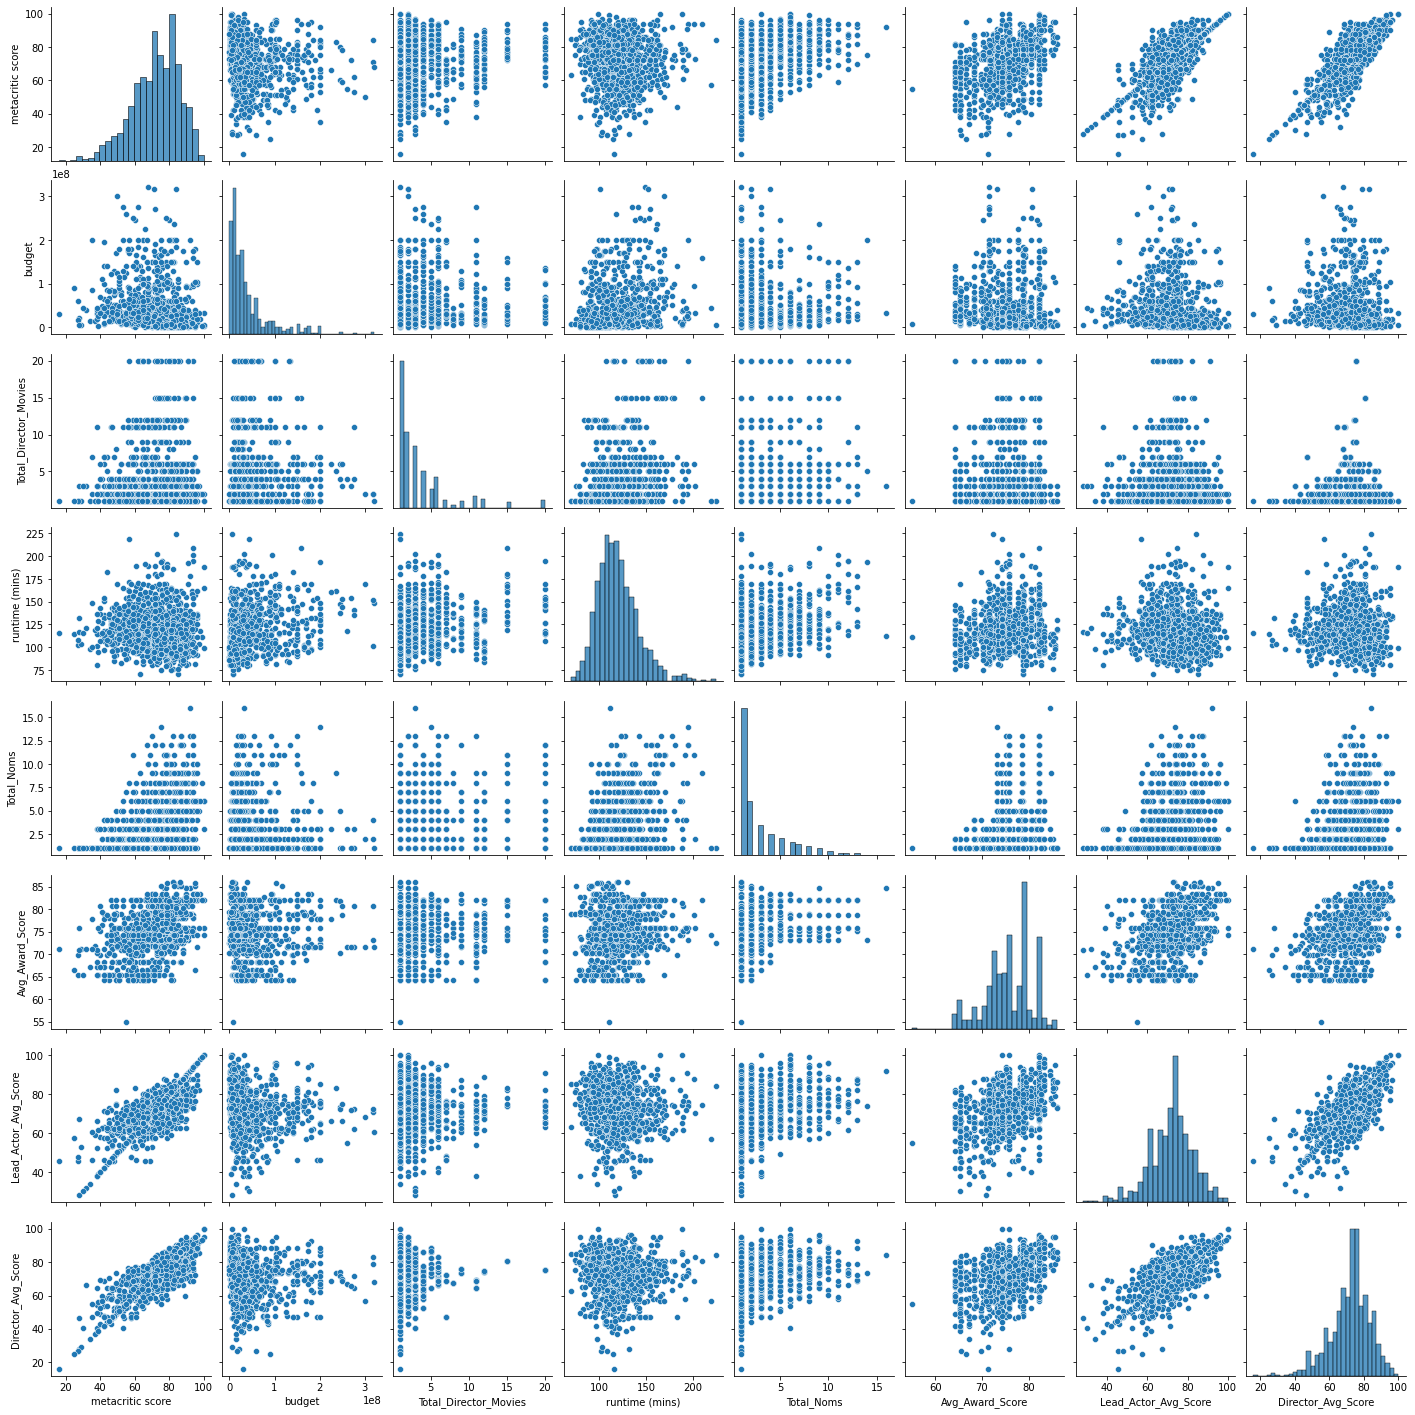

In [21]:
sns.pairplot(oscars_data, vars=['metacritic score','budget','Total_Director_Movies','runtime (mins)','Total_Noms','Avg_Award_Score','Lead_Actor_Avg_Score','Director_Avg_Score'])

In [37]:
oscars_data.fillna(0,inplace=True)

/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4316: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [59]:
def residuals_plot(y_pred,y_test):
    residuals = y_test - y_pred

    plt.figure(figsize=(12,12))
    plt.scatter(y_pred,residuals)

    plt.axhline(0,linestyle="--",color='gray')
    plt.xlabel('Predicted Values',fontsize=18)
    plt.ylabel('Residuals',fontsize=18)

In [63]:
def residual_scatter(y_pred,y_test):
    plt.scatter(y_pred, y_test, alpha=.1)
    plt.plot(np.linspace(50,100,1), np.linspace(50,100,1))

## Split test 

In [40]:
X = oscars_data.drop(columns=['metacritic score'])
y = oscars_data['metacritic score']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)  

In [41]:
X_train.describe()

runtime (mins)        budget  Total_Noms  Avg_Award_Score  \
count      908.000000  9.080000e+02  908.000000       908.000000   
mean       120.633260  4.096697e+07    2.889868        75.720575   
std         22.232035  5.076025e+07    2.632799         4.831326   
min         70.000000  0.000000e+00    1.000000        55.000000   
25%        105.000000  1.000000e+07    1.000000        73.186275   
50%        118.000000  2.300000e+07    2.000000        75.769912   
75%        132.000000  5.000000e+07    4.000000        78.828571   
max        224.000000  3.210000e+08   14.000000        86.111111   

       Awards_Best Actor in a Leading Role  \
count                           908.000000   
mean                              0.085903   
std                               0.280375   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       Awards_Best Actor in a Supporting Role  \
count                              908.000000   
mean                                 0.064978   
std                                  0.246623   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       Awards_Best Actress in a Leading Role  \
count                             908.000000   
mean                                0.064978   
std                                 0.246623   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       Awards_Best Art Direction-Set Decoration  Awards_Best Cinematography  \
count                                908.000000                  908.000000   
mean                                   0.033040                    0.016520   
std                                    0.178839                    0.127534   
min                                    0.000000                    0.000000   
25%                                    0.000000                    0.000000   
50%                                    0.000000                    0.000000   
75%                                    0.000000                    0.000000   
max                                    1.000000                    1.000000   

       Awards_Best Director  ...  Writer_Aaron Sorkin  Writer_Joel Coen  \
count            908.000000  ...           908.000000        908.000000   
mean               0.009912  ...             0.006608          0.009912   
std                0.099118  ...             0.081065          0.099118   
min                0.000000  ...             0.000000          0.000000   
25%                0.000000  ...             0.000000          0.000000   
50%                0.000000  ...             0.000000          0.000000   
75%                0.000000  ...             0.000000          0.000000   
max                1.000000  ...             1.000000          1.000000   

       Writer_John Logan  Writer_Lawrence Kasdan  Writer_Paul Thomas Anderson  \
count         908.000000              908.000000                   908.000000   
mean            0.002203                0.005507                     0.004405   
std             0.046906                0.074043                     0.066262   
min             0.000000                0.000000                     0.000000   
25%             0.000000                0.000000                     0.000000   
50%             0.000000                0.000000                     0.000000   
75%             0.000000                0.000000                     0.000000   
max             1.000000                1.000000                    

In [42]:
X_test.describe()

runtime (mins)        budget  Total_Noms  Avg_Award_Score  \
count      228.000000  2.280000e+02  228.000000       228.000000   
mean       117.640351  3.851139e+07    3.092105        75.921005   
std         19.950656  4.795065e+07    2.952685         4.801383   
min         75.000000  0.000000e+00    1.000000        64.229167   
25%        102.000000  7.741882e+06    1.000000        73.186275   
50%        116.000000  2.200000e+07    2.000000        75.769912   
75%        130.000000  4.725000e+07    4.000000        78.871795   
max        188.000000  3.000000e+08   16.000000        86.111111   

       Awards_Best Actor in a Leading Role  \
count                           228.000000   
mean                              0.127193   
std                               0.333922   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       Awards_Best Actor in a Supporting Role  \
count                              228.000000   
mean                                 0.078947   
std                                  0.270250   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       Awards_Best Actress in a Leading Role  \
count                             228.000000   
mean                                0.043860   
std                                 0.205233   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       Awards_Best Art Direction-Set Decoration  Awards_Best Cinematography  \
count                                228.000000                  228.000000   
mean                                   0.030702                    0.017544   
std                                    0.172888                    0.131575   
min                                    0.000000                    0.000000   
25%                                    0.000000                    0.000000   
50%                                    0.000000                    0.000000   
75%                                    0.000000                    0.000000   
max                                    1.000000                    1.000000   

       Awards_Best Director  ...  Writer_Aaron Sorkin  Writer_Joel Coen  \
count            228.000000  ...                228.0             228.0   
mean               0.013158  ...                  0.0               0.0   
std                0.114201  ...                  0.0               0.0   
min                0.000000  ...                  0.0               0.0   
25%                0.000000  ...                  0.0               0.0   
50%                0.000000  ...                  0.0               0.0   
75%                0.000000  ...                  0.0               0.0   
max                1.000000  ...                  0.0               0.0   

       Writer_John Logan  Writer_Lawrence Kasdan  Writer_Paul Thomas Anderson  \
count         228.000000              228.000000                   228.000000   
mean            0.013158                0.008772                     0.004386   
std             0.114201                0.093452                     0.066227   
min             0.000000                0.000000                     0.000000   
25%             0.000000                0.000000                     0.000000   
50%             0.000000                0.000000                     0.000000   
75%             0.000000                0.000000                     0.000000   
max             1.000000                1.000000                    

## Scale Data

In [43]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

In [44]:
scale = StandardScaler().fit(X_train_scale)
X_train_scale = scale.transform(X_train_scale)
X_test_scale = scale.transform(X_test_scale)

## Simple Linear regression

In [45]:
lm = LinearRegression()
lm.fit(X_train_scale,y_train)

LinearRegression()

In [46]:
y_pred = lm.predict(X_test_scale)

In [47]:
list(zip(oscars_data.drop(columns='metacritic score'),lm.coef_))

[('runtime (mins)', -0.28951482835717124),
 ('budget', -1.1054964816651642),
 ('Total_Noms', 2.642340267701697),
 ('Avg_Award_Score', 0.6021407389935054),
 ('Awards_Best Actor in a Leading Role', 0.22161108330465495),
 ('Awards_Best Actor in a Supporting Role', 0.2934459178583473),
 ('Awards_Best Actress in a Leading Role', 0.33791702368815474),
 ('Awards_Best Art Direction-Set Decoration', -0.36128987445141414),
 ('Awards_Best Cinematography', -0.060895661831100956),
 ('Awards_Best Director', 0.2025446722943931),
 ('Awards_Best Film Editing', -0.3747167259056752),
 ('Awards_Best Motion Picture of the Year', -0.48441804367972496),
 ('Awards_Best Picture', 0.5881166220119951),
 ('Awards_Best Sound', -0.08777158059291512),
 ('Director_Avg_Score', 7.300967764068805),
 ('Total_Director_Movies', -0.40840405173245486),
 ('Lead_Actor_Avg_Score', 4.676760258282238),
 ('Total_Movies_Lead_Actor', -0.1700948072751487),
 ('Avg_Rating_by_Genre', 0.6784958433753784),
 ('Buena Vista Pictures', -0.085

In [48]:
lm.intercept_

71.41628729649621

In [49]:
lm.score(X_train_scale,y_train)

0.8402927501918056

In [50]:
lm.score(X_test_scale,y_test)

0.7614682316559473

In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train_scale))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       metacritic score   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     50.23
Date:                Wed, 07 Oct 2020   Prob (F-statistic):          2.16e-271
Time:                        21:26:06   Log-Likelihood:                -2834.6
No. Observations:                 908   AIC:                             5843.
Df Residuals:                     821   BIC:                             6262.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.4163      0.192    372.754      0.000      71.040      71.792
x1            -0.2894      0.267     -1.085      0.278      -0.813       0.234
x2            -1.1055      0.291     -3.800      0.000      -1.677      -0.535
x3             2.6422      0.308      8.587      0.000       2.038       3.246
x4             0.6021      0.280      2.149      0.032       0.052       1.152
x5             0.2215      0.238      0.929      0.353      -0.246       0.689
x6             0.2935      0.221      1.330      0.184      -0.140       0.727
x7             0.3379      0.220      1.539      0.124      -0.093       0.769
x8            -0.3613      0.216     -1.671      0.095      -0.786       0.063
x9            -0.0609      0.203     -0.299      0.765      -0.460       0.338
x10            0.2025      0.210      0.966      0.334      -0.209       0.614
x11           -0.3748      0.227     -1.652      0.099      -0.820       0.071
x12           -0.4843      0.287     -1.685      0.092      -1.048       0.080
x13            0.5882      0.215      2.733      0.006       0.166       1.011
x14           -0.0876      0.208     -0.421      0.674      -0.496       0.321
x15            7.3010      0.313     23.343      0.000       6.687       7.915
x16           -0.4087      0.547     -0.747      0.456      -1.483       0.666
x17            4.6768      0.317     14.756      0.000       4.055       5.299
x18           -0.1701      0.439     -0.388      0.698      -1.031       0.691
x19            0.6786      0.325      2.088      0.037       0.041       1.316
x20           -0.0851      0.228     -0.373      0.709      -0.533       0.363
x21           -0.0531      0.222     -0.239      0.811      -0.489       0.382
x22            0.0731      0.205      0.356      0.722      -0.329       0.476
x23           -0.1563      0.213     -0.735      0.462      -0.574       0.261
x24            0.0929      0.231      0.401      0.688      -0.361       0.547
x25            0.3008      0.217      1.388      0.166      -0.125       0.726
x26            0.2579      0.218      1.181      0.238      -0.171       0.686
x27           -0.2319      0.223     -1.041      0.298      -0.669       0.205
x28            0.3113      0.235      1.323      0.186      -0.151       0.773
x29           -0.0959      0.234     -0.410      0.682      -0.555       0.363
x30            0.1116      1.086      0.103      0.918      -2.021       2.244
x31           -0.4917      0.810     -0.607      0.544      -2.081       1.098
x32           -0.2770      0.806     -0.344      0.731      -1.860       1.306
x33           -0.8045      1.119     -0.719      0.472      -3.001       1.392
x34           -0.5809      1.159     -0.501      0.616      -2.855       1.693
x35           -0.7482      0.860     -0.870      0.385      -2.436       0.940
x3

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
rms = sqrt(mean_squared_error(y_test,y_pred))
rms

36.78801440500139
4.258877702721786


6.065312391377825

## Apply ridge regression

In [53]:
rm = RidgeCV() 
rm.fit(X_train_scale, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [54]:
list(zip(oscars_data.drop(columns='metacritic score'),rm.coef_))

[('runtime (mins)', -0.28032637051411413),
 ('budget', -1.0801891499148928),
 ('Total_Noms', 2.573193559317982),
 ('Avg_Award_Score', 0.623498164795306),
 ('Awards_Best Actor in a Leading Role', 0.24474963191455967),
 ('Awards_Best Actor in a Supporting Role', 0.309787776060805),
 ('Awards_Best Actress in a Leading Role', 0.34147496174123515),
 ('Awards_Best Art Direction-Set Decoration', -0.3506062689099778),
 ('Awards_Best Cinematography', -0.041799866181015055),
 ('Awards_Best Director', 0.2004358776278785),
 ('Awards_Best Film Editing', -0.37423310765476536),
 ('Awards_Best Motion Picture of the Year', -0.43288756022113795),
 ('Awards_Best Picture', 0.5946326183898307),
 ('Awards_Best Sound', -0.09840617100269222),
 ('Director_Avg_Score', 7.174248235877856),
 ('Total_Director_Movies', -0.3102038514048262),
 ('Lead_Actor_Avg_Score', 4.694765444382194),
 ('Total_Movies_Lead_Actor', -0.17288308972375432),
 ('Avg_Rating_by_Genre', 0.6924792759935077),
 ('Buena Vista Pictures', -0.08713

In [55]:
y_pred = rm.predict(X_test_scale)

In [56]:
rm.score(X_train_scale,y_train)

0.8401805949707286

In [57]:
rm.score(X_test_scale,y_test)

0.7637860526744435

In [58]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
rms = sqrt(mean_squared_error(y_test,y_pred))
rms

36.430544062125854
4.23455551073672


6.035772035301354

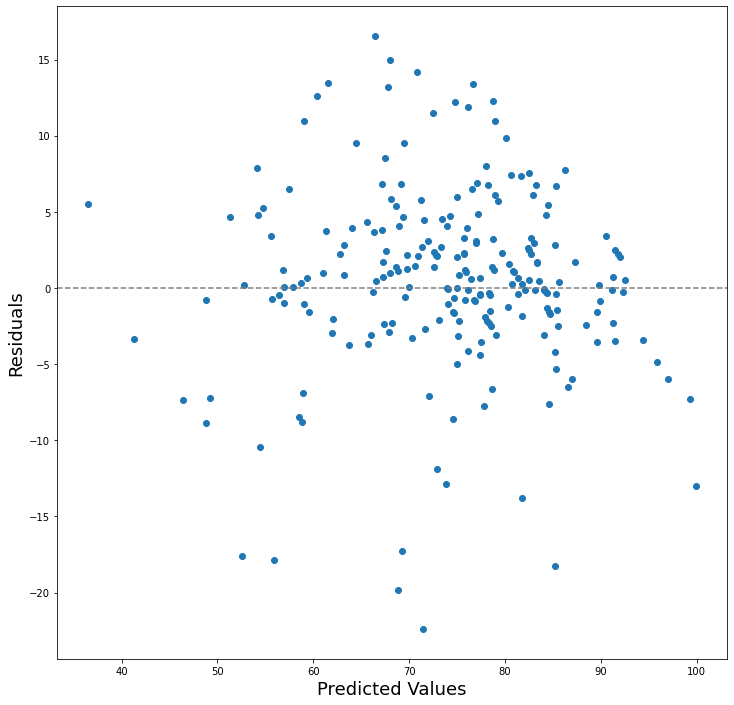

In [60]:
res_plot = residuals_plot(y_pred,y_test)
res_plot

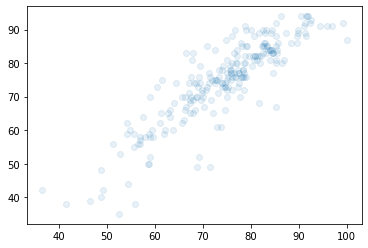

In [64]:
scatter_plot = residual_scatter(y_pred,y_test)
scatter_plot

## Model Without dummy variables

In [83]:
oscars_df = oscars_data.drop(columns = ['R','PG-13','PG','G','Unrated','Winter','Spring','Summer','Fall'])

In [84]:
oscars_df.corr()

runtime (mins)  metacritic score    budget  \
runtime (mins)                    1.000000         -0.019315  0.232852   
metacritic score                 -0.019315          1.000000 -0.162162   
budget                            0.232852         -0.162162  1.000000   
Total_Noms                        0.355896          0.327954  0.075834   
Avg_Award_Score                   0.086005          0.472480 -0.067099   
...                                    ...               ...       ...   
Writer_Pedro Almodóvar           -0.039734          0.067315 -0.040794   
Writer_Peter Morgan              -0.002133          0.013893 -0.014180   
Writer_Quentin Tarantino          0.130759          0.023753  0.019643   
Writer_William Shakespeare        0.050338         -0.038758 -0.019337   
Writer_Woody Allen               -0.111100          0.017157 -0.051488   

                            Total_Noms  Avg_Award_Score  \
runtime (mins)                0.355896         0.086005   
metacritic score              0.327954         0.472480   
budget                        0.075834        -0.067099   
Total_Noms                    1.000000         0.289615   
Avg_Award_Score               0.289615         1.000000   
...                                ...              ...   
Writer_Pedro Almodóvar       -0.037707         0.011020   
Writer_Peter Morgan           0.007038         0.035135   
Writer_Quentin Tarantino      0.073881         0.054628   
Writer_William Shakespeare   -0.003975        -0.023608   
Writer_Woody Allen           -0.016481         0.023463   

                            Awards_Best Actor in a Leading Role  \
runtime (mins)                                         0.132043   
metacritic score                                       0.080313   
budget                                                -0.088107   
Total_Noms                                             0.237237   
Avg_Award_Score                                        0.000609   
...                                                         ...   
Writer_Pedro Almodóvar                                -0.021441   
Writer_Peter Morgan                                   -0.019169   
Writer_Quentin Tarantino                               0.018081   
Writer_William Shakespeare                             0.031709   
Writer_Woody Allen                                    -0.003841   

                            Awards_Best Actor in a Supporting Role  \
runtime (mins)                                            0.078923   
metacritic score                                          0.025476   
budget                                                   -0.072769   
Total_Noms                                                0.119842   
Avg_Award_Score                                          -0.040072   
...                                                            ...   
Writer_Pedro Almodóvar                                   -0.017929   
Writer_Peter Morgan                                      -0.016029   
Writer_Quentin Tarantino                                  0.028665   
Writer_William Shakespeare                               -0.016029   
Writer_Woody Allen                                        0.040646   

                            Awards_Best Actress in a Leading Role  \
runtime (mins)                                           0.005028   
metacritic score                                        -0.013267   
budget                                                  -0.062702   
Total_Noms                                               0.046157   
Avg_Award_Score                                         -0.135779   
...                                                           ...   
Writer_Pedro Almodóvar                                  -0.016908   
Writer_Peter Morgan                                     -0.015116   
Writer_Quentin Tarantino                                -0.018530   
Writer_William Shakespeare                              -0.015116   
Writer_Woody Allen       

<AxesSubplot:>

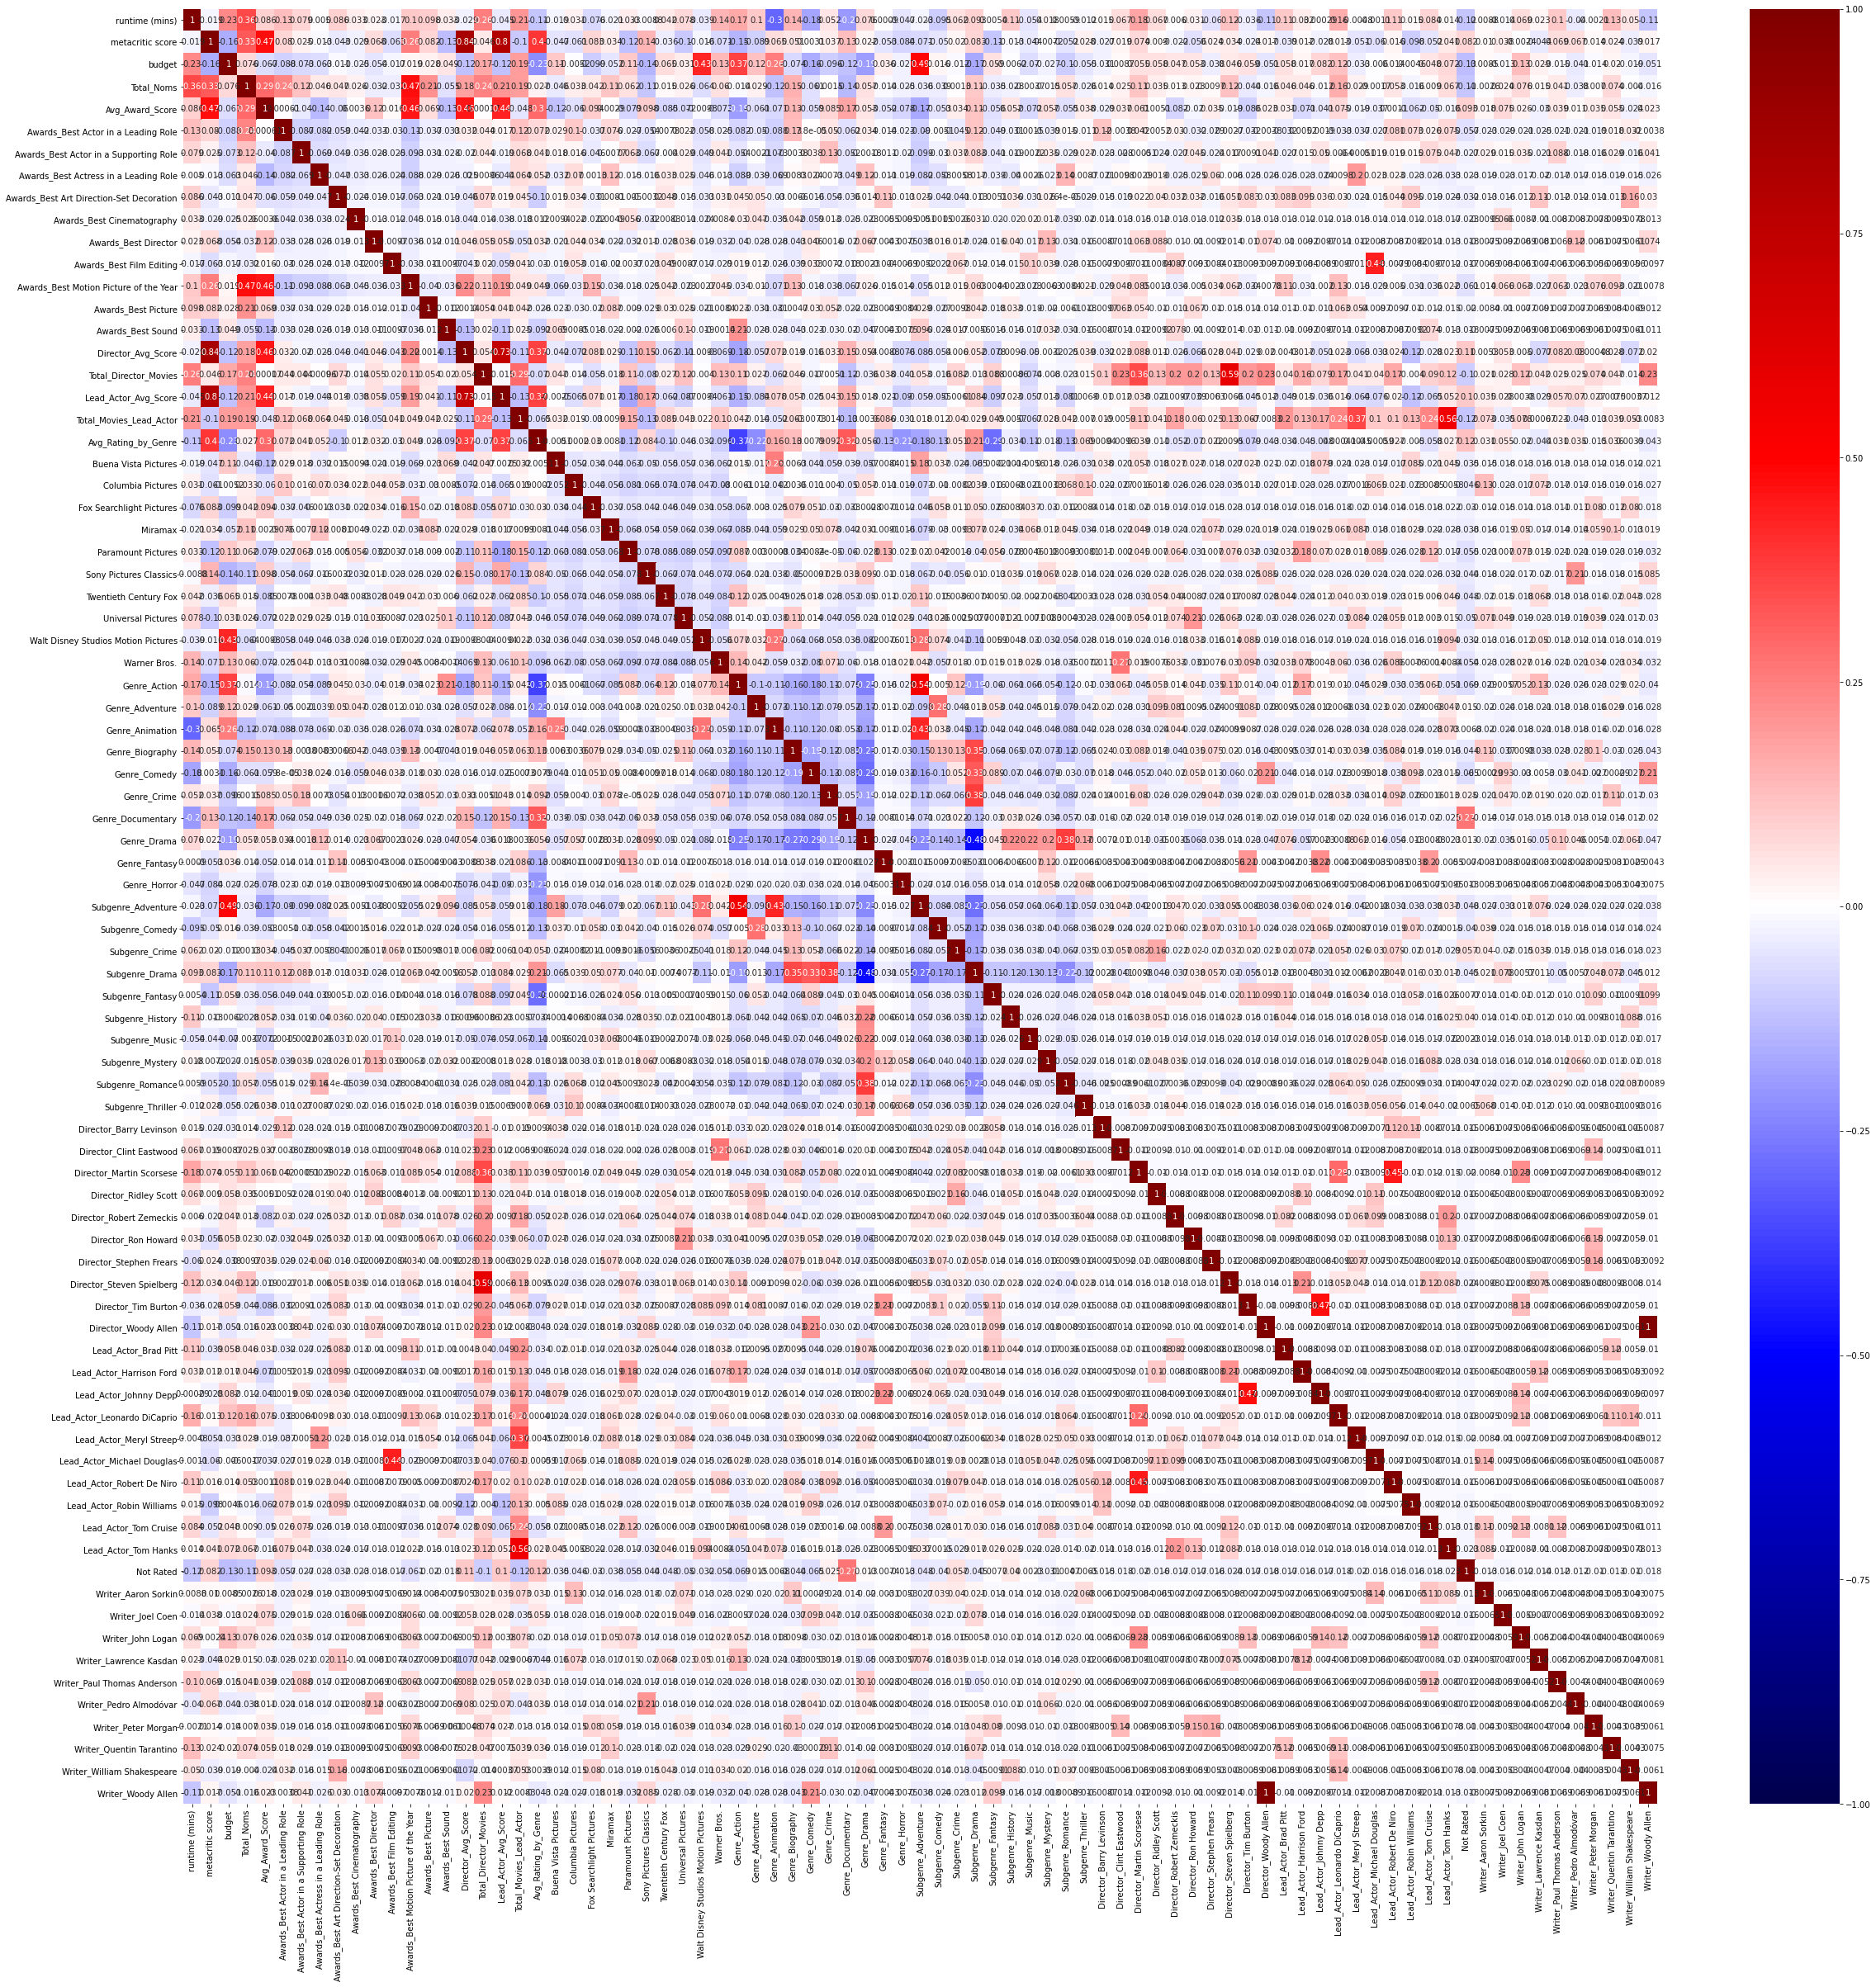

In [86]:
plt.figure(figsize=(40,40))
sns.heatmap(oscars_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

In [87]:
X = oscars_df.drop(columns=['metacritic score'])
y = oscars_df['metacritic score']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)  

In [88]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

In [89]:
scale = StandardScaler().fit(X_train_scale)
X_train_scale = scale.transform(X_train_scale)
X_test_scale = scale.transform(X_test_scale)

In [90]:
lm = LinearRegression()
lm.fit(X_train_scale,y_train)

LinearRegression()

In [91]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train_scale))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       metacritic score   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     53.77
Date:                Wed, 07 Oct 2020   Prob (F-statistic):          1.06e-273
Time:                        22:16:17   Log-Likelihood:                -2844.2
No. Observations:                 908   AIC:                             5848.
Df Residuals:                     828   BIC:                             6233.
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.4163      0.193    370.403      0.000      71.038      71.795
x1            -0.2805      0.266     -1.056      0.291      -0.802       0.241
x2            -1.2075      0.288     -4.192      0.000      -1.773      -0.642
x3             2.6000      0.306      8.488      0.000       1.999       3.201
x4             0.5382      0.276      1.948      0.052      -0.004       1.080
x5             0.1711      0.238      0.719      0.472      -0.296       0.638
x6             0.2697      0.221      1.218      0.223      -0.165       0.704
x7             0.2743      0.219      1.251      0.211      -0.156       0.705
x8            -0.3947      0.217     -1.821      0.069      -0.820       0.031
x9            -0.0070      0.203     -0.034      0.973      -0.406       0.392
x10            0.2220      0.209      1.061      0.289      -0.189       0.633
x11           -0.3608      0.227     -1.587      0.113      -0.807       0.085
x12           -0.5110      0.288     -1.774      0.077      -1.076       0.055
x13            0.5486      0.216      2.542      0.011       0.125       0.972
x14           -0.1163      0.208     -0.559      0.576      -0.525       0.292
x15            7.3854      0.313     23.571      0.000       6.770       8.000
x16           -0.4336      0.549     -0.790      0.430      -1.510       0.643
x17            4.6596      0.318     14.664      0.000       4.036       5.283
x18           -0.2814      0.440     -0.640      0.522      -1.144       0.582
x19            0.6687      0.326      2.049      0.041       0.028       1.309
x20           -0.0511      0.224     -0.228      0.820      -0.491       0.388
x21           -0.0944      0.220     -0.430      0.667      -0.525       0.336
x22            0.0477      0.205      0.233      0.816      -0.355       0.450
x23           -0.2073      0.212     -0.976      0.329      -0.624       0.210
x24            0.1159      0.232      0.500      0.617      -0.339       0.571
x25            0.2999      0.217      1.381      0.168      -0.126       0.726
x26            0.3048      0.218      1.396      0.163      -0.124       0.733
x27           -0.2161      0.223     -0.968      0.334      -0.654       0.222
x28            0.2841      0.235      1.207      0.228      -0.178       0.746
x29           -0.0967      0.234     -0.413      0.680      -0.556       0.363
x30            0.1152      1.090      0.106      0.916      -2.024       2.254
x31           -0.6396      0.813     -0.786      0.432      -2.236       0.957
x32           -0.3217      0.805     -0.399      0.690      -1.903       1.259
x33           -1.0487      1.122     -0.934      0.350      -3.251       1.154
x34           -0.6928      1.163     -0.596      0.552      -2.976       1.590
x35           -0.7690      0.861     -0.893      0.372      -2.459       0.921
x3

In [92]:
list(zip(oscars_data.drop(columns='metacritic score'),lm.coef_))

[('runtime (mins)', -0.28189433507634776),
 ('budget', -1.208179780876059),
 ('Total_Noms', 2.596374955228313),
 ('Avg_Award_Score', 0.5425597076283271),
 ('Awards_Best Actor in a Leading Role', 0.1715576848369622),
 ('Awards_Best Actor in a Supporting Role', 0.2716895999597324),
 ('Awards_Best Actress in a Leading Role', 0.27571251839361066),
 ('Awards_Best Art Direction-Set Decoration', -0.395696914192763),
 ('Awards_Best Cinematography', -0.007755605371168706),
 ('Awards_Best Director', 0.22510390913212963),
 ('Awards_Best Film Editing', -0.36056316066606153),
 ('Awards_Best Motion Picture of the Year', -0.5106164903996238),
 ('Awards_Best Picture', 0.5485991038398121),
 ('Awards_Best Sound', -0.11400110856568246),
 ('Director_Avg_Score', 7.385047732543291),
 ('Total_Director_Movies', -0.42202597503168876),
 ('Lead_Actor_Avg_Score', 4.6582211990285405),
 ('Total_Movies_Lead_Actor', -0.2833605132639214),
 ('Avg_Rating_by_Genre', 0.6700889690696782),
 ('Buena Vista Pictures', -0.05316

In [93]:
y_pred = lm.predict(X_test_scale)

In [94]:
lm.score(X_train_scale,y_train)

0.8368798819417378

In [95]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
rms = sqrt(mean_squared_error(y_test,y_pred))
rms

36.378321498166045
4.211075004815263


6.03144439567887

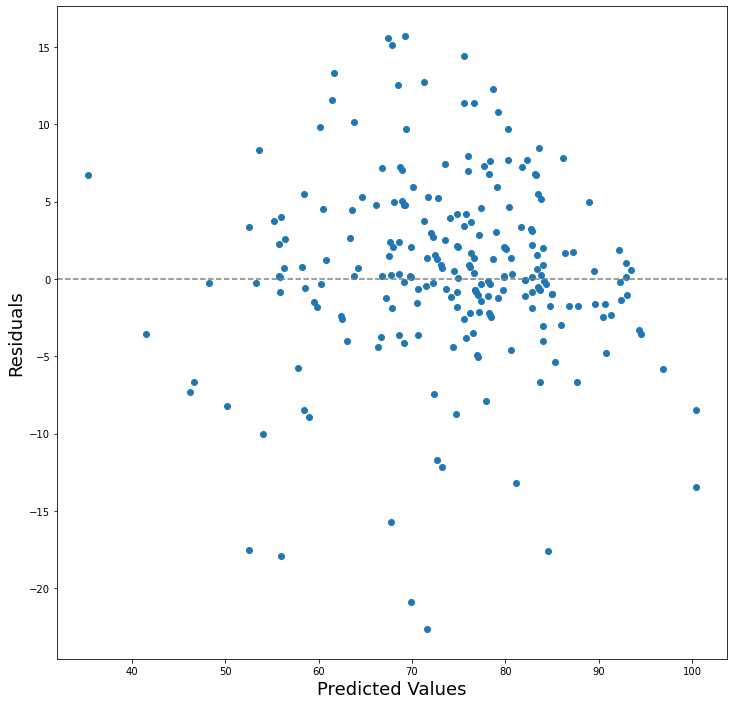

In [96]:
res_plot = residuals_plot(y_pred,y_test)
res_plot

## Drop woody allen

In [99]:
oscars_df = oscars_data.drop(columns = ['R','PG-13','PG','G','Unrated','Winter','Spring','Summer','Fall','Director_Woody Allen'])

In [100]:
oscars_df.corr()

runtime (mins)  metacritic score    budget  \
runtime (mins)                    1.000000         -0.019315  0.232852   
metacritic score                 -0.019315          1.000000 -0.162162   
budget                            0.232852         -0.162162  1.000000   
Total_Noms                        0.355896          0.327954  0.075834   
Avg_Award_Score                   0.086005          0.472480 -0.067099   
...                                    ...               ...       ...   
Writer_Pedro Almodóvar           -0.039734          0.067315 -0.040794   
Writer_Peter Morgan              -0.002133          0.013893 -0.014180   
Writer_Quentin Tarantino          0.130759          0.023753  0.019643   
Writer_William Shakespeare        0.050338         -0.038758 -0.019337   
Writer_Woody Allen               -0.111100          0.017157 -0.051488   

                            Total_Noms  Avg_Award_Score  \
runtime (mins)                0.355896         0.086005   
metacritic score              0.327954         0.472480   
budget                        0.075834        -0.067099   
Total_Noms                    1.000000         0.289615   
Avg_Award_Score               0.289615         1.000000   
...                                ...              ...   
Writer_Pedro Almodóvar       -0.037707         0.011020   
Writer_Peter Morgan           0.007038         0.035135   
Writer_Quentin Tarantino      0.073881         0.054628   
Writer_William Shakespeare   -0.003975        -0.023608   
Writer_Woody Allen           -0.016481         0.023463   

                            Awards_Best Actor in a Leading Role  \
runtime (mins)                                         0.132043   
metacritic score                                       0.080313   
budget                                                -0.088107   
Total_Noms                                             0.237237   
Avg_Award_Score                                        0.000609   
...                                                         ...   
Writer_Pedro Almodóvar                                -0.021441   
Writer_Peter Morgan                                   -0.019169   
Writer_Quentin Tarantino                               0.018081   
Writer_William Shakespeare                             0.031709   
Writer_Woody Allen                                    -0.003841   

                            Awards_Best Actor in a Supporting Role  \
runtime (mins)                                            0.078923   
metacritic score                                          0.025476   
budget                                                   -0.072769   
Total_Noms                                                0.119842   
Avg_Award_Score                                          -0.040072   
...                                                            ...   
Writer_Pedro Almodóvar                                   -0.017929   
Writer_Peter Morgan                                      -0.016029   
Writer_Quentin Tarantino                                  0.028665   
Writer_William Shakespeare                               -0.016029   
Writer_Woody Allen                                        0.040646   

                            Awards_Best Actress in a Leading Role  \
runtime (mins)                                           0.005028   
metacritic score                                        -0.013267   
budget                                                  -0.062702   
Total_Noms                                               0.046157   
Avg_Award_Score                                         -0.135779   
...                                                           ...   
Writer_Pedro Almodóvar                                  -0.016908   
Writer_Peter Morgan                                     -0.015116   
Writer_Quentin Tarantino                                -0.018530   
Writer_William Shakespeare                              -0.015116   
Writer_Woody Allen       

In [110]:
oscars_df.columns

Index(['runtime (mins)', 'metacritic score', 'budget', 'Total_Noms',
       'Avg_Award_Score', 'Awards_Best Actor in a Leading Role',
       'Awards_Best Actor in a Supporting Role',
       'Awards_Best Actress in a Leading Role',
       'Awards_Best Art Direction-Set Decoration',
       'Awards_Best Cinematography', 'Awards_Best Director',
       'Awards_Best Film Editing', 'Awards_Best Motion Picture of the Year',
       'Awards_Best Picture', 'Awards_Best Sound', 'Director_Avg_Score',
       'Total_Director_Movies', 'Lead_Actor_Avg_Score',
       'Total_Movies_Lead_Actor', 'Avg_Rating_by_Genre',
       'Buena Vista Pictures', 'Columbia Pictures', 'Fox Searchlight Pictures',
       'Miramax', 'Paramount Pictures', 'Sony Pictures Classics',
       'Twentieth Century Fox', 'Universal Pictures',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.', 'Genre_Action',
       'Genre_Adventure', 'Genre_Animation', 'Genre_Biography', 'Genre_Comedy',
       'Genre_Crime', 'Genre_Documen

In [101]:
X = oscars_df.drop(columns=['metacritic score'])
y = oscars_df['metacritic score']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)  

In [102]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

In [103]:
scale = StandardScaler().fit(X_train_scale)
X_train_scale = scale.transform(X_train_scale)
X_test_scale = scale.transform(X_test_scale)

In [104]:
lm = LinearRegression()
lm.fit(X_train_scale,y_train)

LinearRegression()

In [105]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train_scale))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       metacritic score   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     53.77
Date:                Wed, 07 Oct 2020   Prob (F-statistic):          1.06e-273
Time:                        22:29:59   Log-Likelihood:                -2844.2
No. Observations:                 908   AIC:                             5848.
Df Residuals:                     828   BIC:                             6233.
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.4163      0.193    370.403      0.000      71.038      71.795
x1            -0.2805      0.266     -1.056      0.291      -0.802       0.241
x2            -1.2075      0.288     -4.192      0.000      -1.773      -0.642
x3             2.6000      0.306      8.488      0.000       1.999       3.201
x4             0.5382      0.276      1.948      0.052      -0.004       1.080
x5             0.1711      0.238      0.719      0.472      -0.296       0.638
x6             0.2697      0.221      1.218      0.223      -0.165       0.704
x7             0.2743      0.219      1.251      0.211      -0.156       0.705
x8            -0.3947      0.217     -1.821      0.069      -0.820       0.031
x9            -0.0070      0.203     -0.034      0.973      -0.406       0.392
x10            0.2220      0.209      1.061      0.289      -0.189       0.633
x11           -0.3608      0.227     -1.587      0.113      -0.807       0.085
x12           -0.5110      0.288     -1.774      0.077      -1.076       0.055
x13            0.5486      0.216      2.542      0.011       0.125       0.972
x14           -0.1163      0.208     -0.559      0.576      -0.525       0.292
x15            7.3854      0.313     23.571      0.000       6.770       8.000
x16           -0.4336      0.549     -0.790      0.430      -1.510       0.643
x17            4.6596      0.318     14.664      0.000       4.036       5.283
x18           -0.2814      0.440     -0.640      0.522      -1.144       0.582
x19            0.6687      0.326      2.049      0.041       0.028       1.309
x20           -0.0511      0.224     -0.228      0.820      -0.491       0.388
x21           -0.0944      0.220     -0.430      0.667      -0.525       0.336
x22            0.0477      0.205      0.233      0.816      -0.355       0.450
x23           -0.2073      0.212     -0.976      0.329      -0.624       0.210
x24            0.1159      0.232      0.500      0.617      -0.339       0.571
x25            0.2999      0.217      1.381      0.168      -0.126       0.726
x26            0.3048      0.218      1.396      0.163      -0.124       0.733
x27           -0.2161      0.223     -0.968      0.334      -0.654       0.222
x28            0.2841      0.235      1.207      0.228      -0.178       0.746
x29           -0.0967      0.234     -0.413      0.680      -0.556       0.363
x30            0.1152      1.090      0.106      0.916      -2.024       2.254
x31           -0.6396      0.813     -0.786      0.432      -2.236       0.957
x32           -0.3217      0.805     -0.399      0.690      -1.903       1.259
x33           -1.0487      1.122     -0.934      0.350      -3.251       1.154
x34           -0.6928      1.163     -0.596      0.552      -2.976       1.590
x35           -0.7690      0.861     -0.893      0.372      -2.459       0.921
x3

In [107]:
list(zip(oscars_df.drop(columns='metacritic score'),lm.coef_))

[('runtime (mins)', -0.28052609006585205),
 ('budget', -1.207539563309655),
 ('Total_Noms', 2.5999941223777445),
 ('Avg_Award_Score', 0.5381632522721188),
 ('Awards_Best Actor in a Leading Role', 0.17113259038076656),
 ('Awards_Best Actor in a Supporting Role', 0.2696793584256172),
 ('Awards_Best Actress in a Leading Role', 0.274322801337874),
 ('Awards_Best Art Direction-Set Decoration', -0.39468389579599905),
 ('Awards_Best Cinematography', -0.006968243944032615),
 ('Awards_Best Director', 0.22196960810253574),
 ('Awards_Best Film Editing', -0.3607779907212221),
 ('Awards_Best Motion Picture of the Year', -0.5109608384998721),
 ('Awards_Best Picture', 0.5485534104719272),
 ('Awards_Best Sound', -0.1162993498024944),
 ('Director_Avg_Score', 7.385443871955284),
 ('Total_Director_Movies', -0.43360284797446924),
 ('Lead_Actor_Avg_Score', 4.659649660471064),
 ('Total_Movies_Lead_Actor', -0.28136390729795685),
 ('Avg_Rating_by_Genre', 0.6686930969000635),
 ('Buena Vista Pictures', -0.05107

In [108]:
lm.score(X_train_scale,y_train)

0.8368804116269386

In [109]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
rms = sqrt(mean_squared_error(y_test,y_pred))
rms

36.378321498166045
4.211075004815263


6.03144439567887

## Apply Lasso Regression

In [111]:
lasso_model = LassoCV() 
lasso_model.fit(X_train_scale, y_train)

LassoCV()

In [112]:
list(zip(oscars_df.drop(columns='metacritic score'), lasso_model.coef_))

[('runtime (mins)', -0.0),
 ('budget', -0.3242072866026833),
 ('Total_Noms', 1.6712667850715068),
 ('Avg_Award_Score', 0.0),
 ('Awards_Best Actor in a Leading Role', 0.0),
 ('Awards_Best Actor in a Supporting Role', 0.0),
 ('Awards_Best Actress in a Leading Role', 0.0),
 ('Awards_Best Art Direction-Set Decoration', -0.0),
 ('Awards_Best Cinematography', 0.0),
 ('Awards_Best Director', 0.0),
 ('Awards_Best Film Editing', -0.0),
 ('Awards_Best Motion Picture of the Year', -0.0),
 ('Awards_Best Picture', 0.20435560958298718),
 ('Awards_Best Sound', -0.0),
 ('Director_Avg_Score', 7.133604590302179),
 ('Total_Director_Movies', -0.0),
 ('Lead_Actor_Avg_Score', 4.8038728832867),
 ('Total_Movies_Lead_Actor', -0.0),
 ('Avg_Rating_by_Genre', 0.2819872621413492),
 ('Buena Vista Pictures', 0.0),
 ('Columbia Pictures', -0.0),
 ('Fox Searchlight Pictures', 0.0),
 ('Miramax', -0.0),
 ('Paramount Pictures', -0.0),
 ('Sony Pictures Classics', 0.0),
 ('Twentieth Century Fox', 0.0),
 ('Universal Pictures

In [113]:
lm.predict(X_test_scale)

array([ 68.95222268,  55.80451603,  77.66216586,  70.57349683,
        78.23033779,  84.99480109,  79.05953734,  86.76754441,
        83.7495885 ,  74.80127847,  88.99877866,  63.01590895,
        83.74288025,  67.87979728, 100.47000974,  76.09622197,
        78.20963634,  75.60962131,  77.17939331,  79.88787558,
        54.0605071 ,  77.15684334,  53.65232802,  60.48408409,
        70.05995176,  73.58335923,  79.89209235,  77.04776231,
        76.62059596,  79.7430884 ,  46.31780366,  64.26484932,
        60.15095007,  67.92582944,  55.99302639,  71.2663455 ,
        67.74078261,  64.69088106,  83.36676364,  69.82285453,
        93.03481708,  83.66217336,  92.93810686,  58.60235145,
        62.34189567,  41.51614462,  92.22387431,  68.97715268,
        84.311649  ,  69.16354282,  68.75137395,  76.21487229,
        78.37869089,  48.23965785,  82.09991958,  84.94512297,
        66.20023626,  81.18000369,  92.88961121,  46.6647608 ,
        85.97876187,  50.2134438 ,  76.69742684,  75.55

In [114]:
lm.score(X_train_scale,y_train)

0.8368804116269386